# 2 - Gaussian RNG

##### Imports:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics 

##### Functions:

In [33]:
def gaussian(t, mu = 0, sigma = 1):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-((t-mu)/sigma)**2/2)

## 2.1 - Box Muller transformation for $\mu = 0$ and $\sigma = 1$

The inverse function is $F^{-1}(x) = \left(-2\log(1-x)\right)^{1/2}$.

In [3]:
def f(x):
    return (-2*np.log(1-x))**0.5

In [6]:
def generate():
    theta = random.uniform(0, 2*np.pi)
    x = random.uniform(0, 1)
    r = f(x)
    
    return (r*np.cos(theta), r*np.sin(theta))

In [12]:
xdata = []
ydata = []
npts = 10**5

for i in range(npts):
    point = generate()
    xdata.append(point[0])
    ydata.append(point[1])

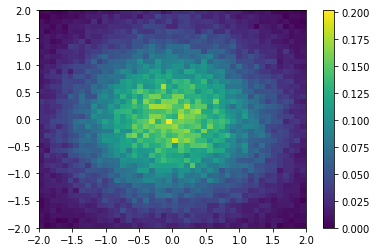

In [32]:
plt.hist2d(xdata, ydata, normed = True, bins = 100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.show()

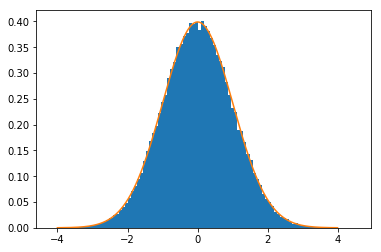

In [34]:
plt.hist(xdata, density = True, bins = 100)
t = np.arange(-4, 4, 0.01)
y = gaussian(t)
plt.plot(t, y)
plt.show()

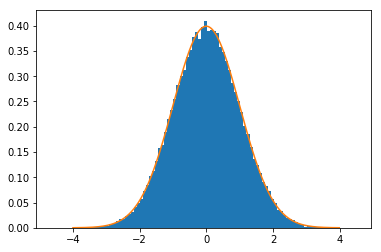

In [35]:
plt.hist(ydata, density = True, bins = 100)
t = np.arange(-4, 4, 0.01)
y = gaussian(t)
plt.plot(t, y)
plt.show()

## 2.2 - Arbitrary $\mu$ and $\sigma$

We have to perform a change of variables: $z \mapsto \frac{z- \mu}{\sigma}$.

In [64]:
def g(x, mu = 0, sigma = 1):
    return mu + sigma*(x)

In [74]:
def generate2(mu, sigma):
    theta = random.uniform(0, 2*np.pi)
    x = random.uniform(0, 1)
    r = f(x)
    
    return (mu + sigma*(r*np.cos(theta)), mu+sigma*(r*np.sin(theta)))

In [75]:
mu = 2
sigma = 1.5

xdata = []
ydata = []
npts = 10**5

for i in range(npts):
    point = generate2(mu, sigma)
    xdata.append(point[0])
    ydata.append(point[1])

In [66]:
# new_xdata = [g(x, mu, sigma) for x in xdata]
# new_ydata = [g(y, mu, sigma) for y in ydata]

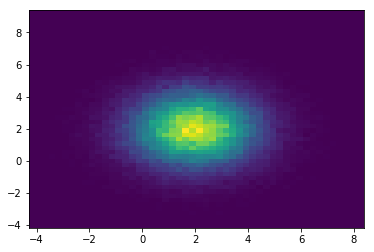

In [78]:
plt.hist2d(xdata, ydata, normed = True, bins = 50)
plt.show()

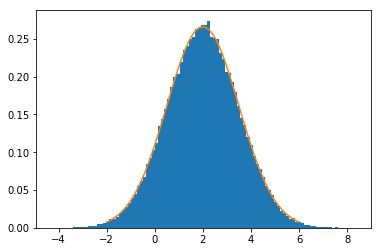

In [80]:
plt.hist(xdata, density = True, bins = 100)
t = np.arange(mu - 4, mu + 4, 0.01)
y = gaussian(t, mu, sigma)
plt.plot(t, y)
plt.show()

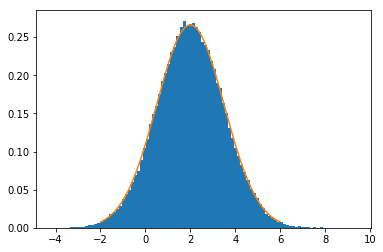

In [81]:
plt.hist(ydata, density = True, bins = 100)
t = np.arange(mu - 4, mu + 4, 0.01)
y = gaussian(t, mu, sigma)
plt.plot(t, y)
plt.show()